In [275]:
pip install matplotlib

You should consider upgrading via the 'c:\users\vani_\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


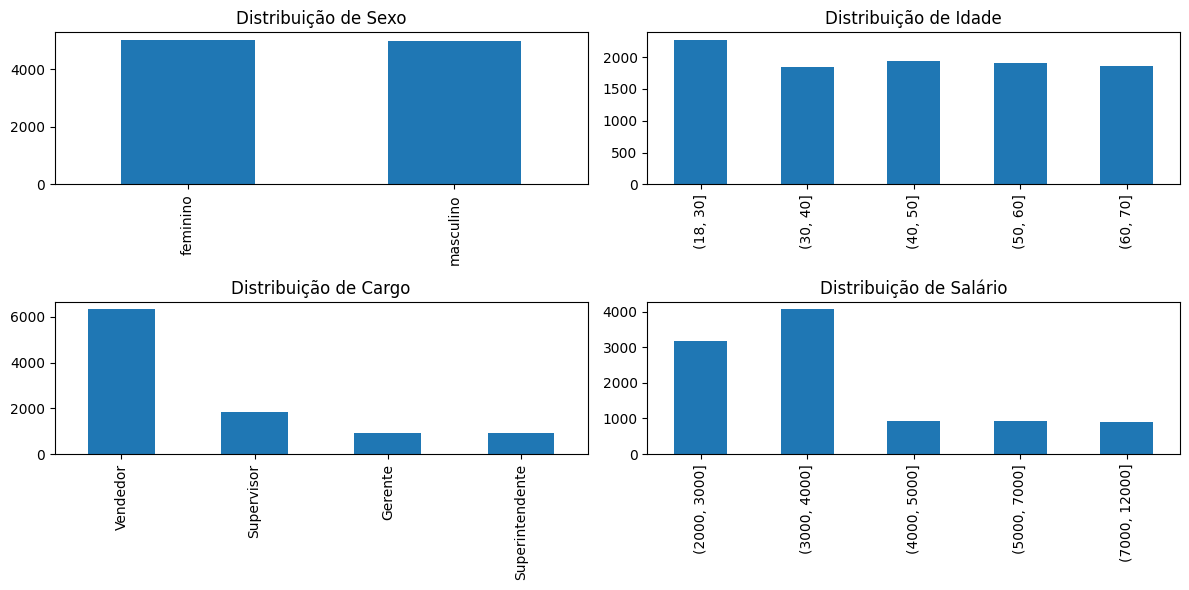

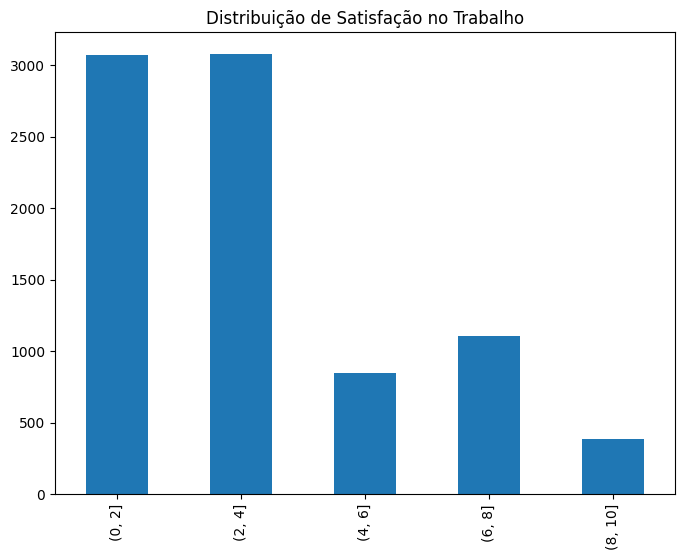

In [276]:
# Fabio Wakisaka 1800221
# Engenharia de Computação
# Pólo Americana
# Projeto Integrador VII
# Modelo Preditivo de Turnover em Empresas

import pandas as pd


import matplotlib.pyplot as plt

df = pd.read_csv('dataset/dataset.csv')
# Define as faixas de intervalos dos campos que possuem valores intervalados
faixas_idade = pd.cut(df['idade'], bins=[18, 30, 40, 50, 60, 70])
faixas_salario = pd.cut(df['salario'], bins=[2000, 3000, 4000, 5000, 7000, 12000])
faixas_satisfacao = pd.cut(df['satisfacaoTrabalho'], bins=[0, 2, 4, 6, 8, 10])

# Gera gráficos de barras para cada campo
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
df['sexo'].value_counts().plot(kind='bar')
plt.title('Distribuição de Sexo')

plt.subplot(2,2,2)
faixas_idade.value_counts(sort=False).plot(kind='bar')
plt.title('Distribuição de Idade')

plt.subplot(2,2,3)
df['cargo'].value_counts().plot(kind='bar')
plt.title('Distribuição de Cargo')

plt.subplot(2,2,4)
faixas_salario.value_counts(sort=False).plot(kind='bar')
plt.title('Distribuição de Salário')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
faixas_satisfacao.value_counts(sort=False).plot(kind='bar')
plt.title('Distribuição de Satisfação no Trabalho')
plt.show()


In [277]:
pip install seaborn

You should consider upgrading via the 'c:\users\vani_\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


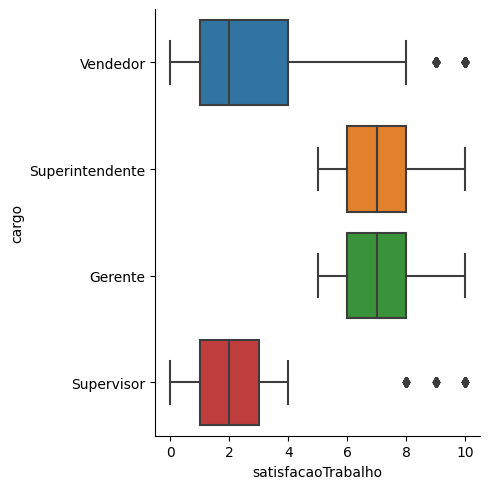

In [278]:
import seaborn as sns

sns.catplot(x="satisfacaoTrabalho", y="cargo", data=df, kind="box")

In [279]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\vani_\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [280]:
import pandas as pd

# Carregar o dataset
df = pd.read_csv("dataset/dataset.csv")

# Converter as colunas de data para o formato datetime
df['dataAdmissao'] = pd.to_datetime(df['dataAdmissao'])
df['dataDesligamento'] = pd.to_datetime(df['dataDesligamento'])

# Calcular o número de funcionários atuais
atual = df[df['dataDesligamento'].isnull()].shape[0]

# Calcular o número de funcionários desligados
desligados = df.shape[0] - atual

# Calcular o turnover
turnover = (desligados / df.shape[0]) * 100

# Imprimir o resultado
print("Turnover: {:.2f}%".format(turnover))


Turnover: 6.00%


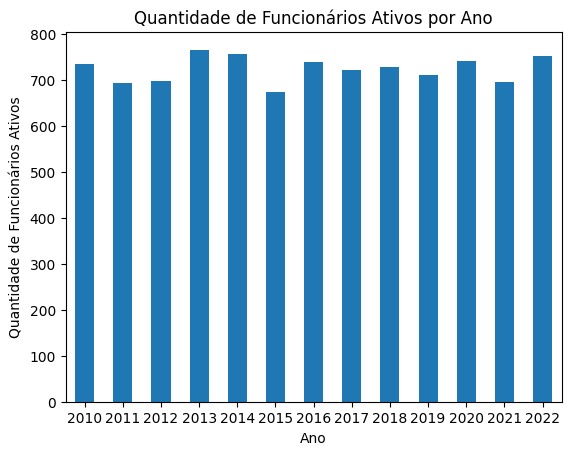

In [281]:
import pandas as pd
import matplotlib.pyplot as plt

# Carrega o dataset com as datas de admissão e desligamento
df = pd.read_csv('dataset/dataset.csv', parse_dates=['dataAdmissao', 'dataDesligamento'], dayfirst=True)

# Cria uma coluna 'status' que indica se o funcionário está ativo ou não na empresa
df['status'] = df['dataDesligamento'].isnull()

# Agrupa os funcionários por ano e conta a quantidade de funcionários ativos em cada ano
funcionarios_ativos = df.groupby(df['dataAdmissao'].dt.year)['status'].sum()

# Plota o gráfico
funcionarios_ativos.plot(kind='bar', rot=0)
plt.title('Quantidade de Funcionários Ativos por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Funcionários Ativos')
plt.show()


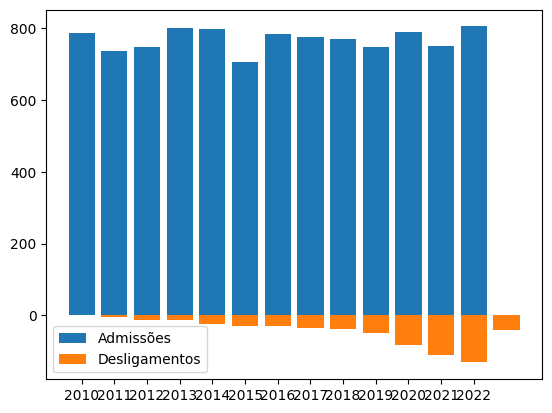

In [282]:
import pandas as pd
import matplotlib.pyplot as plt

# leitura do arquivo
df = pd.read_csv('dataset/dataset.csv', parse_dates=['dataAdmissao', 'dataDesligamento'])

# criação de colunas de ano de admissão e desligamento
df['anoAdmissao'] = df['dataAdmissao'].dt.year
df['anoDesligamento'] = df['dataDesligamento'].dt.year

# agrupamento e contagem de admissões e desligamentos por ano
admissoes_por_ano = df.groupby('anoAdmissao').size()
desligamentos_por_ano = df.groupby('anoDesligamento').size()

# criação do gráfico
plt.bar(admissoes_por_ano.index, admissoes_por_ano.values, label='Admissões')
plt.bar(desligamentos_por_ano.index, -desligamentos_por_ano.values, label='Desligamentos')
plt.xticks(admissoes_por_ano.index)
plt.legend()
plt.show()


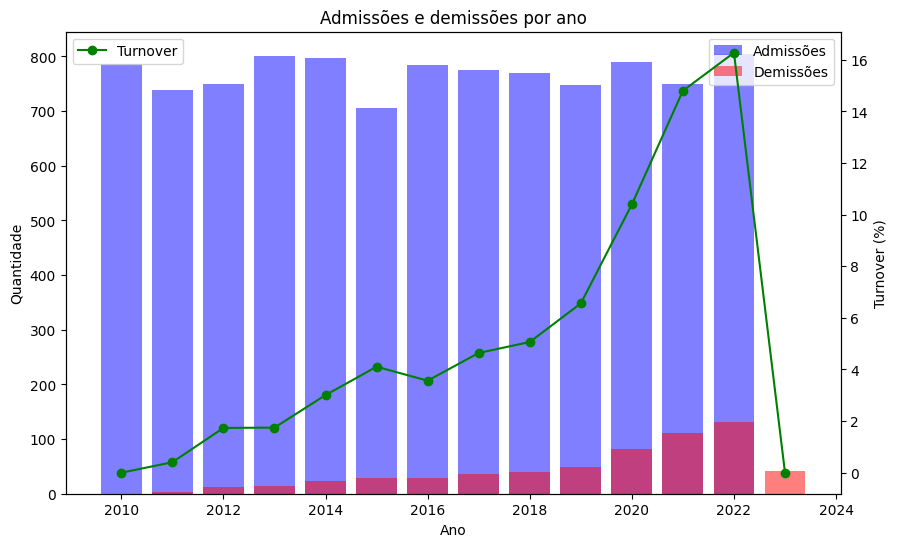

In [283]:
import pandas as pd
import matplotlib.pyplot as plt

# Carrega o dataset
df = pd.read_csv('dataset/dataset.csv', parse_dates=['dataAdmissao', 'dataDesligamento'])

# Agrupa as admissões e demissões por ano
admissoes_por_ano = df.groupby(df['dataAdmissao'].dt.year).size()
demissoes_por_ano = df.groupby(df['dataDesligamento'].dt.year).size()

# Calcula o turnover por ano
turnover_por_ano = ((demissoes_por_ano / admissoes_por_ano) * 100).fillna(0)

# Cria o gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plota as barras de admissões e demissões no eixo primário
ax1.bar(admissoes_por_ano.index, admissoes_por_ano.values, color='blue', alpha=0.5, label='Admissões')
ax1.bar(demissoes_por_ano.index, demissoes_por_ano.values, color='red', alpha=0.5, label='Demissões')
ax1.set_xlabel('Ano')
ax1.set_ylabel('Quantidade')
ax1.set_title('Admissões e demissões por ano')
ax1.legend()

# Cria o eixo secundário para o turnover
ax2 = ax1.twinx()
ax2.plot(turnover_por_ano.index, turnover_por_ano.values, color='green', marker='o', label='Turnover')
ax2.set_ylabel('Turnover (%)')
ax2.legend(loc='upper left')

plt.show()


In [284]:
import pandas as pd
import numpy as np

# Carrega o dataset
df = pd.read_csv('dataset/dataset.csv')


In [285]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sexo'] = le.fit_transform(df['sexo'])


In [286]:
cargo_dummies = pd.get_dummies(df['cargo'], prefix='cargo')
df = pd.concat([df, cargo_dummies], axis=1)
df.drop('cargo', axis=1, inplace=True)


In [287]:
df['dataAdmissao'] = pd.to_datetime(df['dataAdmissao'], format='%Y-%m-%d')
df['dataDesligamento'] = pd.to_datetime(df['dataDesligamento'], format='%Y-%m-%d', errors='coerce')

df['tempo_de_trabalho'] = (df['dataDesligamento'] - df['dataAdmissao']).dt.days


df

,nomeCompleto,sexo,idade,salario,satisfacaoTrabalho,dataAdmissao,dataDesligamento,cargo_Gerente,cargo_Superintendente,cargo_Supervisor,cargo_Vendedor,tempo_de_trabalho
0,Gabrielly Melo,1,21,3776.63,10,2019-04-28,2020-02-23,0,0,0,1,301.0
1,Srta. Fernanda Porto,1,41,9797.26,10,2017-07-27,2020-01-18,0,1,0,0,905.0
2,Dr. André da Mata,1,68,9232.15,10,2017-12-15,2020-02-04,0,1,0,0,781.0
3,Maitê Pires,0,57,6058.31,8,2015-04-05,2015-07-31,1,0,0,0,117.0
4,Luana da Conceição,1,40,8529.22,10,2014-05-16,2016-04-05,0,1,0,0,690.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Maria Cecília Sales,0,60,3845.21,1,2011-07-03,NaT,0,0,0,1,NaN
9996,Augusto Moreira,1,36,2322.12,3,2019-04-18,NaT,0,0,0,1,NaN
9997,Dr. Enzo Gabriel Barros,1,25,4396.48,2,2017-11-19,NaT,0,0,1,0,NaN
9998,Otávio da Costa,0,58,5938.23,6,2017-10-16,NaT,1,0,0,0,NaN


In [288]:
data_ficticia = pd.to_datetime('2023-03-25')
df['dataDesligamento'].fillna(data_ficticia, inplace=True)

# cria coluna alvo
data_atual = pd.to_datetime('today').date()
df['saiu'] = df['dataDesligamento'].apply(lambda x: 0 if pd.isnull(x) or x.date() == data_atual else 1)
# remove coluna dataDesligamento
df.drop('dataDesligamento', axis=1, inplace=True)


tempo_trabalho_max = max(df['tempo_de_trabalho'])
df['tempo_de_trabalho'].fillna(tempo_trabalho_max, inplace=True)


df

,nomeCompleto,sexo,idade,salario,satisfacaoTrabalho,dataAdmissao,cargo_Gerente,cargo_Superintendente,cargo_Supervisor,cargo_Vendedor,tempo_de_trabalho,saiu
0,Gabrielly Melo,1,21,3776.63,10,2019-04-28,0,0,0,1,301.0,1
1,Srta. Fernanda Porto,1,41,9797.26,10,2017-07-27,0,1,0,0,905.0,1
2,Dr. André da Mata,1,68,9232.15,10,2017-12-15,0,1,0,0,781.0,1
3,Maitê Pires,0,57,6058.31,8,2015-04-05,1,0,0,0,117.0,1
4,Luana da Conceição,1,40,8529.22,10,2014-05-16,0,1,0,0,690.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Maria Cecília Sales,0,60,3845.21,1,2011-07-03,0,0,0,1,4526.0,0
9996,Augusto Moreira,1,36,2322.12,3,2019-04-18,0,0,0,1,4526.0,0
9997,Dr. Enzo Gabriel Barros,1,25,4396.48,2,2017-11-19,0,0,1,0,4526.0,0
9998,Otávio da Costa,0,58,5938.23,6,2017-10-16,1,0,0,0,4526.0,0


In [289]:
turnover_train = df[df.index.isin(X_train.index)]['saiu'].sum() / len(X_train)
print(f'Turnover da base de treinamento: {turnover_train:.2%}')


Turnover da base de treinamento: 5.90%


In [306]:
from sklearn.model_selection import train_test_split

X = df.drop(['nomeCompleto', 'dataAdmissao'], axis=1)
y = df['saiu']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [307]:

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [308]:
X

,sexo,idade,salario,satisfacaoTrabalho,cargo_Gerente,cargo_Superintendente,cargo_Supervisor,cargo_Vendedor,tempo_de_trabalho,saiu
0,1,21,3776.63,10,0,0,0,1,301.0,1
1,1,41,9797.26,10,0,1,0,0,905.0,1
2,1,68,9232.15,10,0,1,0,0,781.0,1
3,0,57,6058.31,8,1,0,0,0,117.0,1
4,1,40,8529.22,10,0,1,0,0,690.0,1
...,...,...,...,...,...,...,...,...,...,...
9995,0,60,3845.21,1,0,0,0,1,4526.0,0
9996,1,36,2322.12,3,0,0,0,1,4526.0,0
9997,1,25,4396.48,2,0,0,1,0,4526.0,0
9998,0,58,5938.23,6,1,0,0,0,4526.0,0


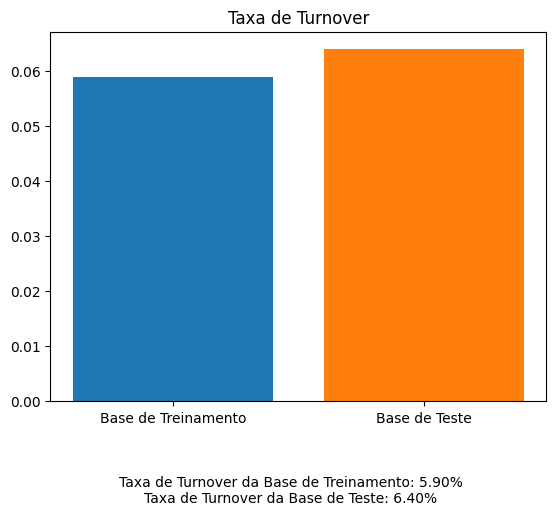

In [309]:
import matplotlib.pyplot as plt

# Calcula a taxa de turnover da base de treinamento
train_turnover_rate = y_train.sum() / len(y_train)

# Calcula a taxa de turnover da base de teste
test_turnover_rate = y_test.sum() / len(y_test)

# Define os rótulos para as barras do gráfico
labels = ['Base de Treinamento', 'Base de Teste']

# Define os valores das barras do gráfico
values = [train_turnover_rate, test_turnover_rate]

# Define as cores das barras do gráfico
colors = ['#1f77b4', '#ff7f0e']

# Cria o gráfico de barras
plt.bar(labels, values, color=colors)

# Adiciona o título do gráfico
plt.title('Taxa de Turnover')

# Adiciona um texto explicativo abaixo do gráfico
plt.figtext(0.5, -0.1, f"Taxa de Turnover da Base de Treinamento: {train_turnover_rate:.2%}\nTaxa de Turnover da Base de Teste: {test_turnover_rate:.2%}", ha='center')

# Exibe o gráfico
plt.show()


Acurácia: 100.00%


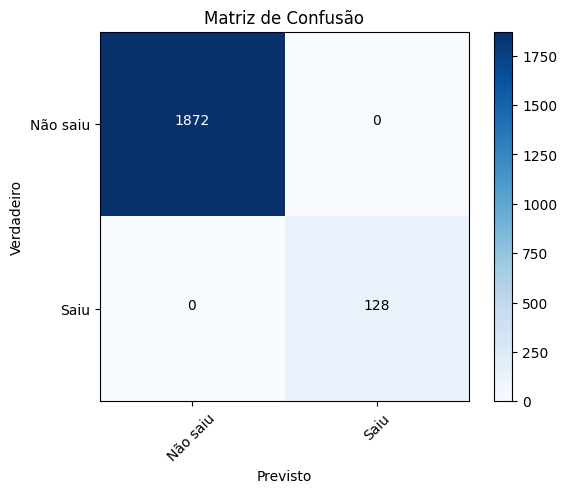

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1872
           1       1.00      1.00      1.00       128

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [310]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Fazer as previsões na base de teste
y_pred = logreg.predict(X_test)

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia: {:.2f}%".format(accuracy * 100))

# Gerar matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Gerar relatório de classificação
cr = classification_report(y_test, y_pred)

# Plotar a matriz de confusão
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Não saiu', 'Saiu'], rotation=45)
plt.yticks(tick_marks, ['Não saiu', 'Saiu'])
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.show()

# Mostrar o relatório de classificação
print("Relatório de Classificação:")
print(cr)


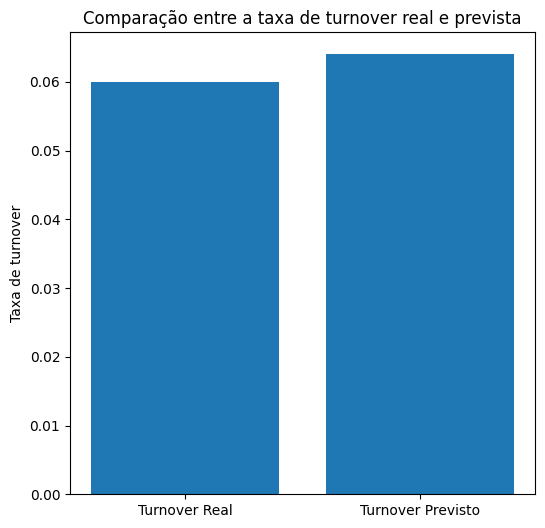

In [311]:
import matplotlib.pyplot as plt

# Calcula as taxas de turnover real e prevista pelo modelo
turnover_real = y.mean()
turnover_previsto = logreg.predict(X_test).mean()

# Cria uma figura
fig, ax = plt.subplots(figsize=(6,6))

# Adiciona as barras no gráfico
ax.bar(['Turnover Real', 'Turnover Previsto'], [turnover_real, turnover_previsto])

# Adiciona título e rótulos nos eixos
ax.set_title('Comparação entre a taxa de turnover real e prevista')
ax.set_ylabel('Taxa de turnover')

# Mostra o gráfico
plt.show()
